# U.S. Medical Insurance Costs

## Scope of the work:
 * My overarching goal is to see if there is a story behind the data. 
 * The data will look at different population statistics by region, what factors lead to an increase in medical insurance cost, as well as how factors such as age or sex can affect likelikehood of being a smoker or having children.


### Import libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
from numpy.polynomial.polynomial import polyfit
import warnings
warnings.filterwarnings('ignore')

##### Imported the insurance csv file and then converted all the columns to their own individual variables for easier accesibility later.


In [3]:
insurance = pd.read_csv('insurance.csv')
#columns to variables
age = insurance.age
sex = insurance.sex
bmi = insurance.bmi
children = insurance.children
smoker = insurance.smoker
region = insurance.region
charges = insurance.charges
print(insurance.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


There are 7 variables, not including the ID. 
Age is quantitative, sex is categorical/binary, bmi is quantitative, smoker is categorical/binary, region is categorical/nonbinary, charges is quantitative.

##### I ran a loop that converted all of the columns into barplots to see if there was any evident significance in any of the individual columns' distribution. The only thing that was evident from the data was that there was a significant number of 18 and 19 year olds compared to the other ages, and most of those who had insurance were nonsmokers

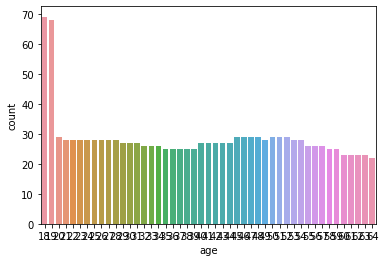

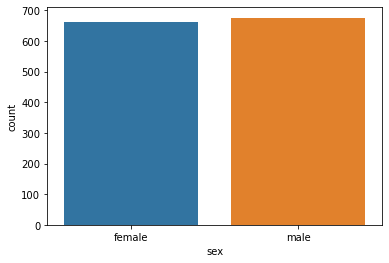

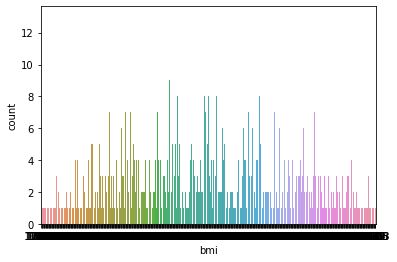

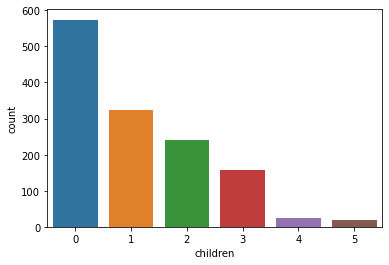

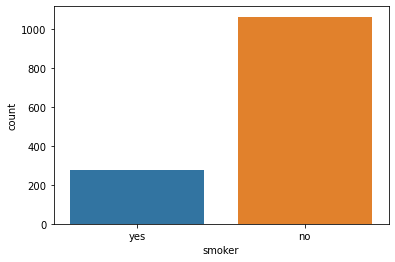

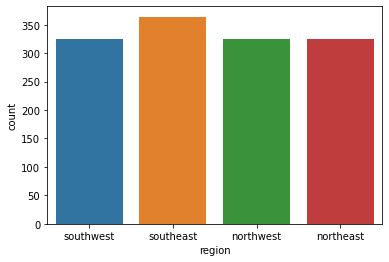

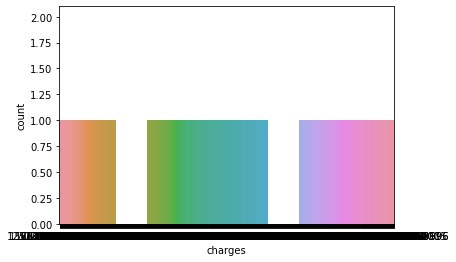

<Figure size 432x288 with 0 Axes>

In [6]:
columns = insurance.columns.tolist()
for column in columns:
    sns.countplot(insurance[column])
    plt.show()
    plt.clf()

There is no obvious cause as to why such a large number of 18 and 19 year olds have insurance compared to the other ages. An explanation would be that individuals in those age groups might still be in college and be playing a sport, which often requires some kind of insurance. Another explanation is that although insurance cost may start off cheap, increasing cost will deter insurance holders from keeping their policies, especially if they are near or below the poverty line.

### Exploring the relationships to each individual region

#### Create variables for individual regions and ages and test if there was any difference in spread of ages among region

In [10]:
sw_age = insurance.age[insurance.region == 'southwest']
se_age = insurance.age[insurance.region =='southeast']
nw_age = insurance.age[insurance.region == 'northwest']
ne_age = insurance.age[insurance.region == 'northeast']
fstat, pval = f_oneway(sw_age, se_age, nw_age, ne_age)
print(pval)

0.970989069987742


P value is .97, which means there is no statistical significance between the regions. A boxplot further proves that there is no difference in spread amongst the regions.

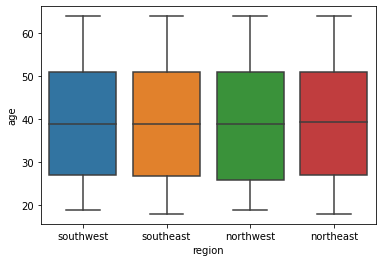

<Figure size 432x288 with 0 Axes>

In [13]:
sns.boxplot(x='region', y='age', data=insurance)
plt.show()
plt.clf()

#### Comparing region and bmi with tukey test and boxplots

In [18]:
tukey = pairwise_tukeyhsd(insurance.bmi, insurance.region, 0.05)
print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
northeast northwest   0.0263    0.9 -1.1552  1.2078  False
northeast southeast   4.1825  0.001   3.033   5.332   True
northeast southwest   1.4231 0.0107  0.2416  2.6046   True
northwest southeast   4.1562  0.001  3.0077  5.3047   True
northwest southwest   1.3968 0.0127  0.2162  2.5774   True
southeast southwest  -2.7594  0.001 -3.9079 -1.6108   True
----------------------------------------------------------


Tukey test reveals there is a significant difference between difference in BMI among the regions. Boxplot below shows further that the bmi in the southeast is higher than the other regions. 

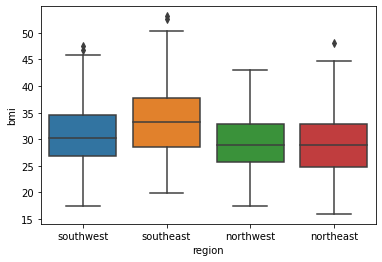

<function matplotlib.pyplot.clf()>

In [17]:
sw_bmi = insurance.bmi[insurance.region == 'southwest']
se_bmi = insurance.bmi[insurance.region =='southeast']
nw_bmi = insurance.bmi[insurance.region == 'northwest']
ne_bmi = insurance.bmi[insurance.region == 'northeast']

sns.boxplot(x='region', y='bmi', data=insurance)
plt.show()
plt.clf
